In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
import re,urllib3,time,csv,datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import matplotlib.dates as mpd
import plotly.offline as py_offline
import plotly.graph_objs as go

%matplotlib inline

In [2]:
data_location = "C:/Users/workspace/SH_tongliang/database/bitmex_1min/bitmex_1min/"
file1 = "ethz18_1m.csv"
file2 = "bchz18_1m.csv"
df1 = pd.read_csv(data_location + file1)
df2 = pd.read_csv(data_location + file2)

In [3]:
# Step 1：Laad csv file and preprocess: T/5T/15T/30T/H/2H/4H/D/W/M
def preprocess(data_location, file):
    df = pd.read_csv(data_location + file)
    df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    df.index = pd.DatetimeIndex(df['time'])
    return df

# Step 2：转变数据周期：
def resample(df, period):
    convrted_df = df.resample(period).last()
    convrted_df['open'] = df['open'].resample(period).first()
    convrted_df['high'] = df['high'].resample(period).max()
    convrted_df['low'] = df['low'].resample(period).min()
    convrted_df['close'] = df['close'].resample(period).last()
    convrted_df['volume'] = df['volume'].resample(period).sum()
    # Keep rows with at least 5 non-NaN values
    convrted_df.dropna(thresh=5, inplace=True)
    convrted_df.index = convrted_df['time']
    convrted_df['time'] = pd.DatetimeIndex(convrted_df['time'])
    return convrted_df

# 整合成四小时的数据频率

In [4]:
period = '4H'

df1 = preprocess(data_location, file1)
convrted_df1 = resample(df1, period)

df2 = preprocess(data_location, file2)
convrted_df2 = resample(df2, period)

In [5]:
data0 = convrted_df1.copy()
data1 = convrted_df2.copy()

eth = data0[['close']]
bch = data1[['close']]

# 观察两个资产之间的走势关系图

In [7]:
def two_graphs_twinx(series1, series2):
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 1)
    series2.plot(ax = ax2, color = 'red', lw = 1)

    ax1.axhline(0, color = 'blue', linestyle='--', lw=1)
    ax2.axhline(0, color = 'red', linestyle='--', lw=1)
    
def three_graphs_twinx(series1, series2, series3):
    
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 1)
    series2.plot(ax = ax2, color = 'red', lw =1)
    series3.plot(ax = ax3, color = 'green', lw = 1)

    # ax1.axhline(-1.0, color='g', linestyle='--', lw=1)
    ax2.axhline(0, color = 'red', linestyle='--', lw=1)
    ax3.axhline(0, color = 'green', linestyle='--', lw=1)

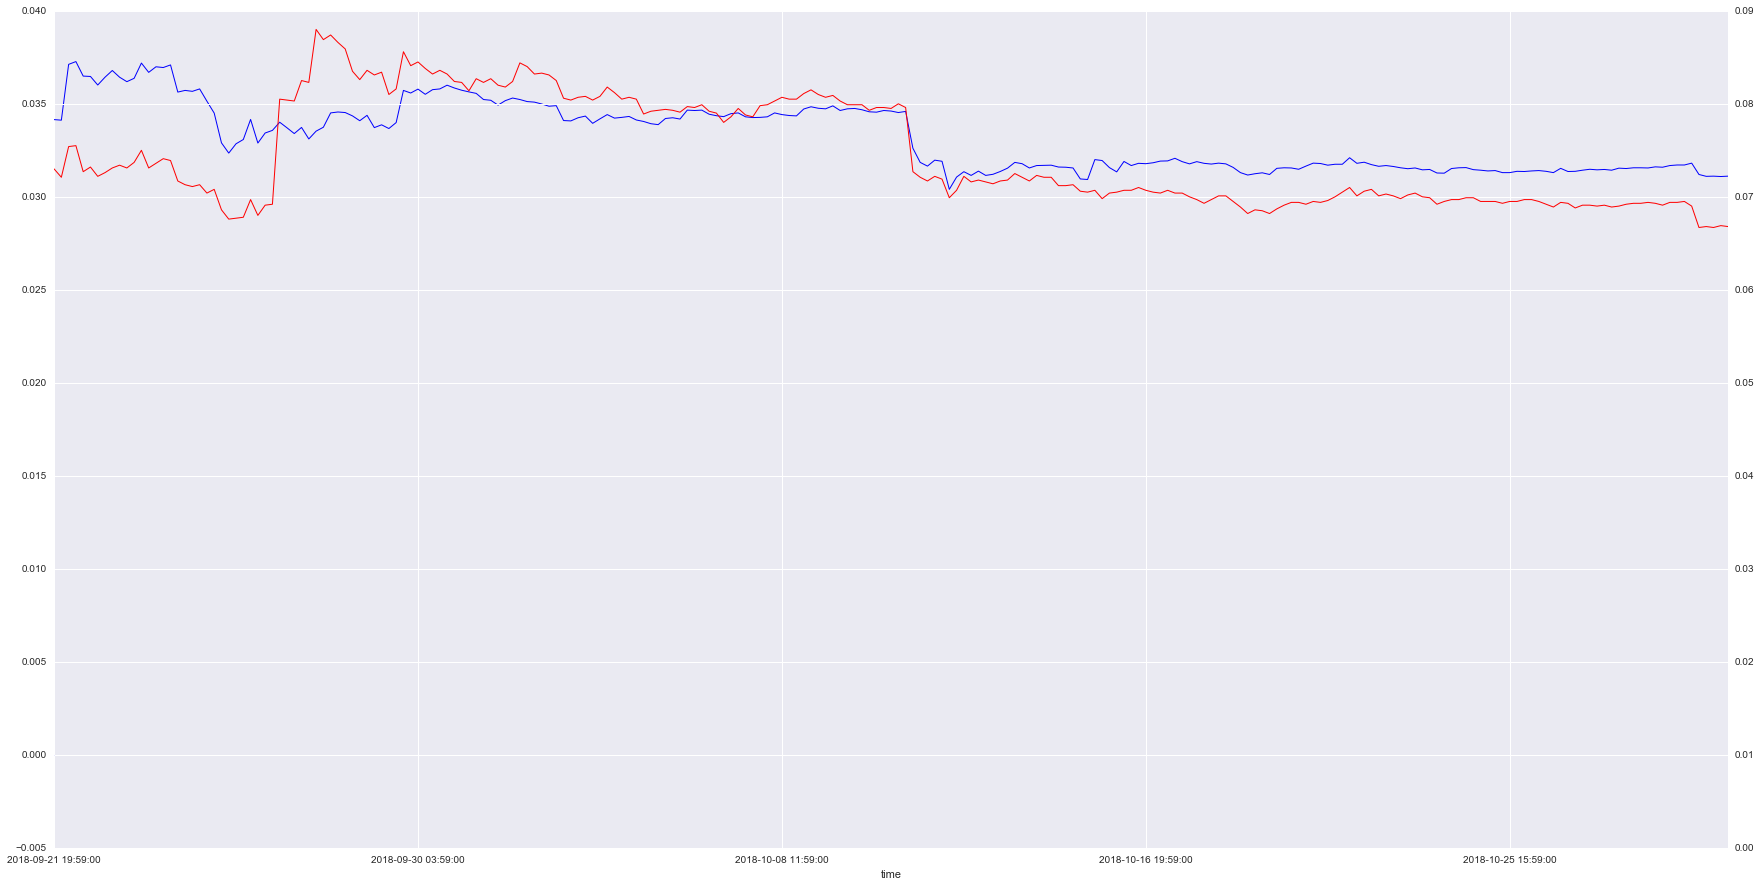

In [8]:
two_graphs_twinx(eth['close'], bch['close'])

# 验证两资产上涨和下跌幅度之间的高相关性

In [9]:
eth_pct_sr = eth['close'].pct_change().dropna()
bch_pct_sr = bch['close'].pct_change().dropna()

Average correlation between eth pct_change and bch pct_change:


0.60072482258995352

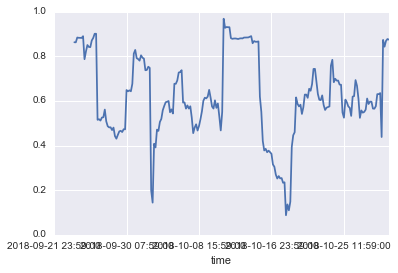

In [10]:
rolling_period = 20

rolling_corr = eth_pct_sr.rolling(window = rolling_period, min_periods=15).corr(bch_pct_sr)
rolling_corr.plot()

print ("Average correlation between eth pct_change and bch pct_change:")
eth_pct_sr.corr(bch_pct_sr)

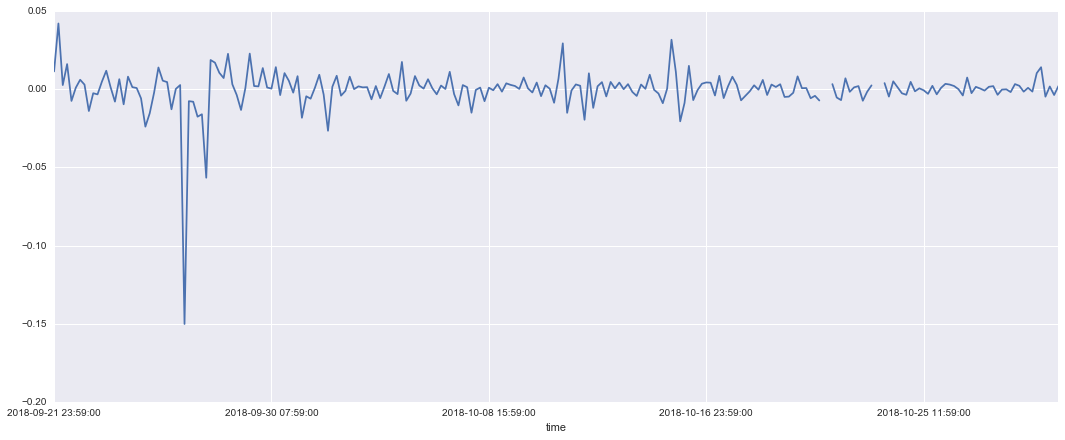

In [12]:
spread = eth_pct_sr - bch_pct_sr
sprd_mean = spread.rolling(window=rolling_period, min_periods=15).mean()
sprd_stdev = spread.rolling(window=rolling_period, min_periods=15).std()
z_score = (spread - sprd_mean)/sprd_stdev
spread.plot(figsize=(18, 7))

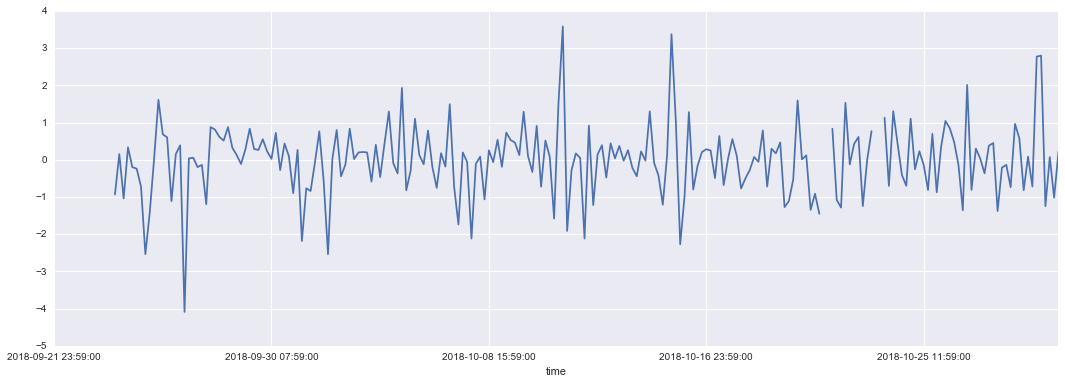

In [13]:
z_score.plot(figsize=(18, 6))